In [1]:
import numpy as np # linear algebra
import pandas as pd 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from autocorrect import Speller
from nltk.stem.wordnet import WordNetLemmatizer 
spell = Speller(lang='en')
from nltk.corpus import stopwords 
import itertools
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_regression,chi2
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc



[nltk_data] Downloading package stopwords to C:\Users\In Christ
[nltk_data]     alone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
training_df = pd.read_csv('clean_content 0.1 million sample.csv', encoding= 'iso-8859-1')

In [ ]:
corpus = []
s = set(stopwords.words('english'))
s.remove('not')
print("Stopwords length", len(s))

# function to remove the elongated words
def remove_elongated(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [ ]:
# !pip install tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="Example Desc")

def review_to_words( raw_review ):

    lem = WordNetLemmatizer()
    # 1. Remove HTML
    text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    words = set(nltk.corpus.words.words())
    text = re.sub("@[\w\d]+",'', text)
    text = re.sub("http:[\w\:\/\.]+",'', text) # remove url
    text=  re.sub('[^a-zA-Z]',' ', text)
    text = re.sub('[^[A-Za-z]\s]','', text)   # any char or letter before a word    
    text = re.sub('[^\w\s]','', text) # remove whitespace and punctuation 
    text = text.lower()

    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    
    # 3. Convert to lower case, split into individual words
    words = text.lower().split()     
    
    # 4. Create set of stopwords
    stops = (stopwords.words("english"))                  
   
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    meaningful_words = [remove_elongated(token) for token in meaningful_words]
    
   # meaningful_words = [spell(token) for token in meaningful_words]
    
   # meaningful_words = [token if token not in slang_words else slang_words[token] for token in meaningful_words]
    
   # meaningful_words = [lem.lemmatize(token) for token in meaningful_words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [ ]:
training_df['clean_content'] = training_df['content'].progress_apply(review_to_words)
training_df.rename(columns = {'clean_review':'review'},inplace = True)
training_df['length_content'] = training_df['clean_content'].progress_apply(len)
training_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))


plt.title("Data Distribution")
sns.countplot(x='sentiment',data=(training_df))

In [ ]:
training_df['length_content'] = training_df['clean_content'].str.split().apply(len)
training_df = training_df.drop(training_df[training_df.length_content < 1].index)
training_df

training_df.to_csv('clean_content with new filters 86918 rows.csv') 

In [ ]:
#pickling preprocessed data 

#filename = 'clean_content with new filters 22249'
#outfile = open(filename,'wb')
#pickle.dump(training_df,outfile)
#outfile.close()
#pickling preprocessed data 

#filename = 'clean_content with new filters 86916'
#outfile = open(filename,'wb')
#pickle.dump(training_df,outfile)
#outfile.close()

In [ ]:
import pickle
infile = open('clean_content with new filters 22249','rb')  # accuracy 90 
training_df= pickle.load(infile)
infile.close()

import pickle
infile = open('clean_content with new filters 86916','rb') # accuracy 64
training_df= pickle.load(infile)
infile.close()

from sklearn.preprocessing import LabelEncoder
y = y_train
lb=LabelEncoder()
y_train=lb.fit_transform(y)

from sklearn.preprocessing import LabelEncoder
y = y_test
lb=LabelEncoder()
y_test=lb.fit_transform(y)

# choose any of the two vectorization method

In [37]:
# create a count vectorizer object 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word',stop_words='english', ngram_range= (1, 1), max_features= None)#ngram_range= (1, 4)
count_vect.fit(training_df['clean_content'])

# transform the text data using count vectorizer object
text =  count_vect.transform(training_df['clean_content'])

from sklearn.preprocessing import LabelEncoder
y = training_df['sentiment']
lb=LabelEncoder()
label=lb.fit_transform(y)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1,sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(text, label)
print("After resampling of text", X_resampled.shape)
print("After resampling of label", y_resampled.shape)

After resampling of text (205260, 47333)
After resampling of label (205260,)


In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(text.toarray(), columns=vect.get_feature_names())

In [58]:
# display vocabulary lenght
vocab_tokens = count_vect.get_feature_names()
len(vocab_tokens)

47333

In [47]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['aa', 'aaberg', 'aac', 'aafternoon', 'aaggess', 'aaggh', 'aagh', 'aah', 'aahaha', 'aahahah', 'aahh', 'aahhg', 'aahs', 'aaiiee', 'aaliyah', 'aaliyamulla', 'aall', 'aamazing', 'aamu', 'aand', 'aannd', 'aanndd', 'aaoouoouoouu', 'aap', 'aapko', 'aarg', 'aargh', 'aaron', 'aaronmacgruder', 'aaronovitch', 'aarrggh', 'aarrgghh', 'aarrgh', 'aaryn', 'aasahan', 'aasman', 'aass', 'aatw', 'aau', 'aauugghh', 'aaw', 'aawesome', 'aawh', 'aawhh', 'aaww', 'aawwesome', 'ab', 'aba', 'ababa', 'aback']


In [61]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['zone', 'zoned', 'zoneing', 'zones', 'zongzi', 'zoning', 'zonisamide', 'zoo', 'zookeeper', 'zoom', 'zoombezi', 'zoomed', 'zooming', 'zooms', 'zooted', 'zoozoo', 'zorn', 'zorz', 'zotz', 'zq', 'zqixd', 'zr', 'zrgrizz', 'zrs', 'zs', 'zsg', 'zsu', 'zu', 'zucchini', 'zuccini', 'zukav', 'zuko', 'zul', 'zulema', 'zulu', 'zum', 'zuma', 'zumba', 'zune', 'zur', 'zurich', 'zwarte', 'zwitschert', 'zx', 'zxe', 'zycuodiwkz', 'zydrate', 'zyrtec', 'zz', 'zzy']


# HashingVectorizer

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(analyzer='word',stop_words='english', ngram_range= (1, 2))
X = hash_vectorizer.fit_transform(training_df['clean_content'])

# transform the text data using count vectorizer object
text = hash_vectorizer.transform(training_df['clean_content'])


from sklearn.preprocessing import LabelEncoder
y = training_df['sentiment']
lb=LabelEncoder()
label=lb.fit_transform(y)


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1,sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(text, label)
print("After resampling of text", X_resampled.shape)
print("After resampling of label", y_resampled.shape)

# choose any of the two sample spliting method

In [ ]:
from sklearn.model_selection import StratifiedKFold
X= X_resampled
y= y_resampled
skf = StratifiedKFold(n_splits=30,shuffle=True, random_state=True)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=100)

print("Traning set dim",X_train.shape,"|Type  ", type(X_train))
print("Train label    ",y_train.shape,"        |Type  ", type(y_train))
print("Test set dim   ",X_test.shape," |Type  ", type(X_test))
print("Test label     ",y_test.shape,"         |Type  ", type(y_test))

Traning set dim (143682, 47333) |Type   <class 'scipy.sparse.csr.csr_matrix'>
Train label     (143682,)         |Type   <class 'numpy.ndarray'>
Test set dim    (61578, 47333)  |Type   <class 'scipy.sparse.csr.csr_matrix'>
Test label      (61578,)          |Type   <class 'numpy.ndarray'>


In [42]:
text_clf = Pipeline([('clf_svm', OneVsRestClassifier(SGDClassifier(loss='hinge', 
                                                                   penalty = 'elasticnet', 
                                                                   alpha= 1e-5, max_iter = 100, 
                                                                   tol= 1e-5, random_state=0))),])
                                           
#OneVsRestClassifier
#('vect', CountVectorizer(stop_words='english', ngram_range= (1, 4), max_features= None)),
# ('fetur_selet', SelectKBest(mutual_info_regression, k='all')),
_ = text_clf.fit(X_train,y_train)

C:\Users\In Christ alone\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
with open('SGD_Model.pickle', 'wb') as f:
    pickle.dump(text_clf, f)


y = label_binarize(y_test, classes=[0,1,2,3])
n_classes = 4


# classifier
y_score = text_clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if i==0:
            j='Happy'
        elif i==1:
            j='Hate'
        elif i==2:
            j='Neutral'
        else:
            j='Sadness'
            
        plt.title('Receiver operating characteristic of : '+j)
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
from yellowbrick.model_selection import LearningCurve

# Instantiate the mlp model and visualizer
visualizer = LearningCurve(text_clf, scoring='accuracy')

visualizer.fit(X_train,y_train)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
# precision-recall curve and f1
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

Y = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = Y.shape[1]

# classifier
y_score = text_clf.decision_function(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_dummies.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))


plt.figure(figsize=(10,9))
plt.step(recall['micro'], precision['micro'], where='post',label='Precision recall')
plt.xlabel('Recall',)
plt.ylabel('Precision')
plt.legend(loc="best",fontsize='x-large')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

In [ ]:
# roc curve
fpr = dict()
tpr = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
plt.figure(figsize=(15,8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i],y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, linestyle='solid',label='class {}'.format(i))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best",fontsize='x-large')

plt.title("ROC curve")

plt.show()


In [64]:
predicted_svm = text_clf.predict(X_test)
np.mean(predicted_svm == y_test)

0.8359316639059404

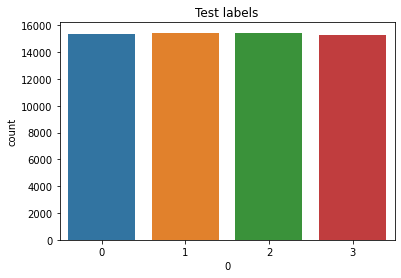

In [62]:
import seaborn as sns
plt.title("Test labels")
sns.countplot(x=0,data=pd.DataFrame(y_test))

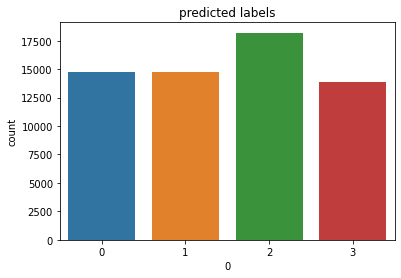

In [65]:
plt.title("predicted labels")
sns.countplot(x=0,data=pd.DataFrame(predicted_svm))

In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_svm))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     15368
           1       0.97      0.92      0.94     15448
           2       0.74      0.88      0.80     15451
           3       0.83      0.75      0.79     15311

    accuracy                           0.84     61578
   macro avg       0.84      0.84      0.84     61578
weighted avg       0.84      0.84      0.84     61578



In [ ]:
# Cross validation @  fold
from sklearn.model_selection import cross_val_score

score_pre = cross_val_score(text_clf, X_resampled, y_resampled, cv = 10, scoring = 'accuracy' )
print("Cross validation accuracy :", score_pre*100)
print('Mean Score :', score_pre.mean())

Normalized confusion matrix
[[0.82 0.01 0.08 0.09]
 [0.01 0.97 0.01 0.02]
 [0.11 0.02 0.74 0.12]
 [0.07 0.04 0.05 0.83]]


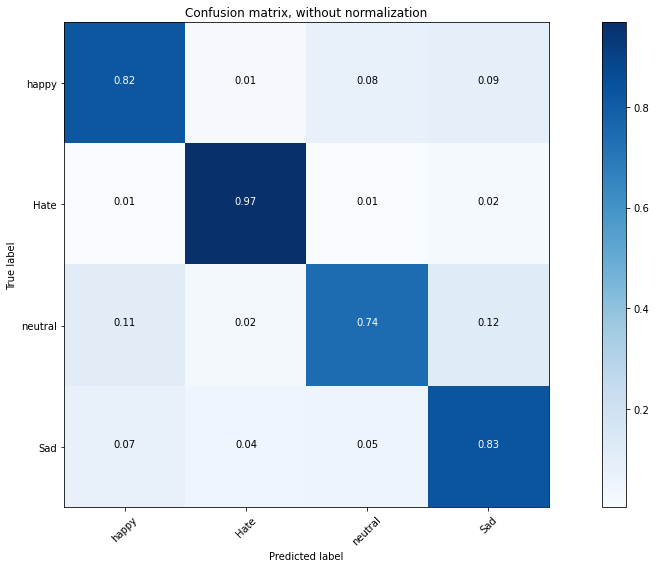

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(predicted_svm,y_test,labels= [0,1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=['happy', 'Hate','neutral','Sad'],
                      title='Confusion matrix, without normalization')

In [68]:
test_set = ["What his idea? Copy China and get his supporter to say his idea?",
           "There are bigger issues to solved and this stolen ideas gets praised. Is million dollar ministers capable of only such ideas??",
           "old people are demanding nowadays, and they ask why their children dumped them.",
           "your mouth stink.",
            "thats damn fucked up boi",
            "i'm going to stuff that up your sorry ass",
            "cb fuck this shit",
            "I hate to be in a train where people fart and make me feel like going to die. ",
            "death",
            "hate you",
            "thank you",
           "The word ‘happy’ would lose its meaning if it were not balanced by sadness.",
           "The longer and more carefully we look at a funny story, the sadder it becomes",
           'So it’s true, when all is said and done, grief is the price we pay for love.',
           "Although it has some benefits, frequently feeling sad can impact your quality of life.",
           "You can avoid this by taking proactive measures such as focusing on improving your well-being, taking actions to be happier, and sharing your feelings with a trusted one.",
            "Relationships are like glass. Sometimes it’s better to leave them broken than try to hurt yourself putting it back together",
           "Some people are going to leave, but that’s not the end of your story. That’s the end of their part in your story",
           "If we must part forever, Give me but one kind word to think upon, And please myself with, while my heart’s breaking.",
           "kill",
           "birthday",
           "",
           "broken heart",
            "You only live once, but if you do it right, once is enough.",
            "Always forgive your enemies; nothing annoys them so much.",
            "Life is what happens when you’re busy making other plans.",
            "Never let the fear of striking out keep you from playing the game",
            "It would definitely be ideal, considering your situation",
            "Great news!",
            "It is a very generous offer",
            "Yes, it is an exciting prospect",
            "That is absolutely fascinating",
            "I can highly recommend"
           ]

for text in test_set:
    print(text)
    print("===============================================")
    text =  count_vect.transform([text]) # if using count vectorizor
    #text = vectorizer.transform([text]) # if using count hash vectorizor
    pred=text_clf.predict(text)
    if pred== 0:
          print("sentiment is Happy")
    elif pred == 1:
          print("sentiment is Hate")
    elif pred == 2:
          print("sentiment is neutral")    
    elif pred == 3:
          print("sentiment is Sad")  
    print("===============================================")

What his idea? Copy China and get his supporter to say his idea?
sentiment is Sad
There are bigger issues to solved and this stolen ideas gets praised. Is million dollar ministers capable of only such ideas??
sentiment is Happy
old people are demanding nowadays, and they ask why their children dumped them.
sentiment is neutral
your mouth stink.
sentiment is neutral
thats damn fucked up boi
sentiment is Hate
i'm going to stuff that up your sorry ass
sentiment is Sad
cb fuck this shit
sentiment is Hate
I hate to be in a train where people fart and make me feel like going to die. 
sentiment is Hate
death
sentiment is neutral
hate you
sentiment is Hate
thank you
sentiment is Happy
The word ‘happy’ would lose its meaning if it were not balanced by sadness.
sentiment is Sad
The longer and more carefully we look at a funny story, the sadder it becomes
sentiment is Sad
So it’s true, when all is said and done, grief is the price we pay for love.
sentiment is Sad
Although it has some benefits, f

# final test with git commit message

In [54]:
commit_df = pd.read_csv('clean FOR TEST.csv', encoding= 'iso-8859-1')

In [ ]:
commit_df['clean_content'] = commit_df['content'].progress_apply(review_to_words)
commit_df.rename(columns = {'clean_review':'review'},inplace = True)
commit_df.head()

In [ ]:
commit_df['length_content'] = commit_df['clean_content'].str.split().apply(len)
commit_df = commit_df.drop(commit_df[commit_df.length_content < 1].index)
commit_df

In [55]:
commit_text= commit_df['clean_content']
target= commit_df['sentiment']

In [56]:
# transform the text data using count vectorizer object
text =  count_vect.transform(commit_df['clean_content'])
#text = vectorizer.transform(commit_df['clean_content']) # if using count hash vectorizor
    
from sklearn.preprocessing import LabelEncoder
y = target
lb=LabelEncoder()
label=lb.fit_transform(y)


predicted_svm = text_clf.predict(text)
np.mean(predicted_svm == label)

0.8831598020898858

In [57]:
from sklearn import metrics
print(metrics.classification_report(predicted_svm, label))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     21807
           1       0.95      0.99      0.97     49051
           2       0.88      0.61      0.72     15930
           3       0.79      0.84      0.81     19725

    accuracy                           0.88    106513
   macro avg       0.86      0.83      0.84    106513
weighted avg       0.88      0.88      0.88    106513



# GRID SERACH AND RANDOM SEARCH FOR HYPERMETER TUNING

In [ ]:
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause

from pprint import pprint
from time import time
import logging

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier()),])

parameters = {'vect__max_df': (0.2, 0.5, 0.75, 1.0), 'vect__max_features': (None, 5000, 10000, 50000),
              'vect__ngram_range': ((1, 1), (1, 2),(1, 3)), 'clf-svm__alpha': (0.01, 0.001),
              'clf-svm__penalty': ('l2', 'elasticnet'),
             'clf-svm__max_iter': (10, 50, 80),'tfidf__norm': ('l1', 'l2'),'tfidf__use_idf': (True, False)}


###   #'clf__max_iter': (10, 50, 80),  #'tfidf__norm': ('l1', 'l2'),   #'tfidf__use_idf': (True, False),
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
grid_search.fit(X_train,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(xtrain_count,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# specify "parameter distributions" rather than a "parameter grid"
param_dist = {'clf-svm__alpha': (0.01, 0.001),
              'clf-svm__penalty': ('l1','l2', 'elasticnet'),
             'clf-svm__max_iter': (10, 50, 80),
             'clf-svm__loss': ('hinge','log', 'modified_huber', 'squared_hinge', 'perceptron')}


# n_iter controls the number of searches
rand = RandomizedSearchCV(text_clf, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_resampled, y_resampled)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(rand.best_score_)
print(rand.best_params_)

In [ ]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

# other codes

In [ ]:
test_set = ["What his idea? Copy China and get his supporter to say his idea?",
           "There are bigger issues to solved and this stolen ideas gets praised. Is million dollar ministers capable of only such ideas??",
           "old people are demanding nowadays, and they ask why their children dumped them.",
           "your mouth stink.",
            "thats damn fucked up boi",
            "i'm going to stuff that up your sorry ass",
            "cb fuck this shit",
            "I hate to be in a train where people fart and make me feel like going to die. ",
            "death",
            "hate you",
            "thank you",
           "The word ‘happy’ would lose its meaning if it were not balanced by sadness.",
           "The longer and more carefully we look at a funny story, the sadder it becomes",
           'So it’s true, when all is said and done, grief is the price we pay for love.',
           "Although it has some benefits, frequently feeling sad can impact your quality of life.",
           "You can avoid this by taking proactive measures such as focusing on improving your well-being, taking actions to be happier, and sharing your feelings with a trusted one.",
            "Relationships are like glass. Sometimes it’s better to leave them broken than try to hurt yourself putting it back together",
           "Some people are going to leave, but that’s not the end of your story. That’s the end of their part in your story",
           "If we must part forever, Give me but one kind word to think upon, And please myself with, while my heart’s breaking.",
           "kill",
           "birthday",
           "",
           "broken heart",
            "You only live once, but if you do it right, once is enough.",
            "Always forgive your enemies; nothing annoys them so much.",
            "Life is what happens when you’re busy making other plans.",
            "Never let the fear of striking out keep you from playing the game",
            "It would definitely be ideal, considering your situation",
            "Great news!",
            "It is a very generous offer",
            "Yes, it is an exciting prospect",
            "That is absolutely fascinating",
            "I can highly recommend"
           ]

for text in test_set:
    print(text)
    print("===============================================")
    text =  count_vect.transform([text]) # if using count vectorizor
    #text = vectorizer.transform([text]) # if using count hash vectorizor
    pred=text_clf.predict(text)
    if pred== 0:
          print("sentiment is ANGER")
    elif pred == 1:
          print("sentiment is HATE")
    elif pred == 2:
          print("sentiment is JOY")    
    elif pred == 3:
          print("sentiment is NEU") 
    elif pred == 4:
          print("sentiment is SADNESS")  
    print("===============================================")